# Example 2: -  Analyzing dim6 operators in WBF 

## Preparations

Let us first load all the python libraries again

In [1]:
import sys
import os
madminer_src_path = "/Users/felixkling/Documents/GitHub/madminer"
sys.path.append(madminer_src_path)

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.fisherinformation import project_information,profile_information
from madminer.plotting import plot_distribution_of_information

## 4. Calculate Fisher Information at Truth Level

In [2]:
lhedatafile='data/madminer_lhedata.h5'

### 4a) Get Fisher Info

In [4]:
#Initialize
mf = FisherInformation(lhedatafile)

# Define Benchmark
thistheta=np.array([0,0])

#Define luminosity in inverse pb
thislumi=300*1000;

#Define Cuts
thiscuts = []

#Define efficiency functions (these correspond to photon tagging efficiency)
thisefficiencies = []

Total and Rate Fisher Info

In [5]:
fi_full, _ = mf.calculate_fisher_information_full_truth(
    theta=thistheta,
    luminosity=thislumi
)
fi_rate, _ = mf.calculate_fisher_information_rate(
    theta=thistheta,
    luminosity=thislumi
)

Histogram Fisher Info

In [6]:
#Assign Observables 
thisxobservable='dphijj'
thisxrange=(0,3.2)
thisxnbins=20

thisyobservable='m_jj'
thisyrange=(500,2500)
thisynbins=20

# Calculate Info
fi_hist1d_dphi, _ = mf.calculate_fisher_information_hist1d(
    theta=thistheta,luminosity=thislumi,
    observable=thisxobservable,nbins=thisxnbins,histrange=thisxrange,
    cuts=thiscuts,efficiency_functions=thisefficiencies
)
fi_hist1d_mjj, _ = mf.calculate_fisher_information_hist1d(
    theta=thistheta,luminosity=thislumi,
    observable=thisyobservable,nbins=thisynbins,histrange=thisyrange,
    cuts=thiscuts,efficiency_functions=thisefficiencies
)
fi_hist2d, _ = mf.calculate_fisher_information_hist2d(
    theta=thistheta,luminosity=thislumi,
    observable1=thisxobservable,nbins1=thisxnbins,histrange1=thisxrange,
    observable2=thisyobservable,nbins2=thisynbins,histrange2=thisyrange,
    cuts=thiscuts,efficiency_functions=thisefficiencies,
)

/Users/felixkling/Documents/GitHub/madminer/madminer/fisherinformation.py:1184: RuntimeWarning: divide by zero encountered in true_divide
  inv_sigma = sanitize_array(1.0 / sigma)  # Shape (n_events,)


In [9]:
print ('Full    Fisher Info: \n' , fi_full       , "\n Determinant: ", np.linalg.det(fi_full) )  
print ('Rate    Fisher Info: \n' , fi_rate       , "\n Determinant: ", np.linalg.det(fi_rate) )
print ('mjj     Fisher Info: \n' , fi_hist1d_mjj , "\n Determinant: ", np.linalg.det(fi_hist1d_mjj) ) 
print ('dphi    Fisher Info: \n' , fi_hist1d_dphi, "\n Determinant: ", np.linalg.det(fi_hist1d_dphi) ) 
print ('Hist 2D Fisher Info: \n' , fi_hist2d     , "\n Determinant: ", np.linalg.det(fi_hist2d) ) 

Full    Fisher Info: 
 [[ 0.64891774 -0.09099898]
 [-0.09099898  0.59967493]] 
 Determinant:  0.38085888756143627
Rate    Fisher Info: 
 [[0.0692379  0.02095182]
 [0.02095182 0.00634015]] 
 Determinant:  5.529730504318933e-20
mjj     Fisher Info: 
 [[0.08967327 0.02413458]
 [0.02413458 0.00693225]] 
 Determinant:  3.916008344411451e-05
dphi    Fisher Info: 
 [[ 0.08996594 -0.01761881]
 [-0.01761881  0.08745138]] 
 Determinant:  0.007557222589021296
Hist 2D Fisher Info: 
 [[ 0.11367772 -0.02170083]
 [-0.02170083  0.10926866]] 
 Determinant:  0.01195048505536917


### 4b) The Bar Plot

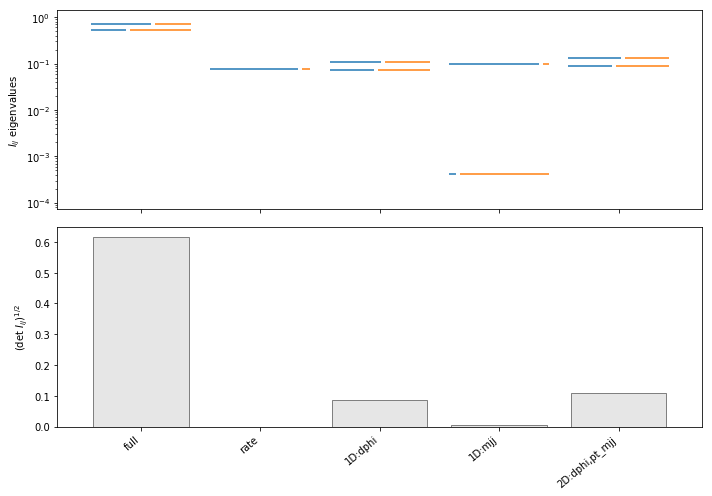

In [10]:
from madminer.plotting import plot_fisherinfo_barplot

list_of_fi=[fi_full,fi_rate,fi_hist1d_dphi,fi_hist1d_mjj,fi_hist2d]
list_of_labels=["full","rate","1D:dphi","1D:mjj","2D:dphi,pt_mjj"] 
list_of_operators=[r'$\mathcal{O}_{W}$',r'$\mathcal{O}_{WW}$']
list_of_projected_fi=[ project_information(list_of_fi[i],[0]) for i in range(0,len(list_of_fi))] 

barplot = plot_fisherinfo_barplot(
    fisher_information_matrices=list_of_fi,
    labels=list_of_labels
)

### 4c) The Contour Plot

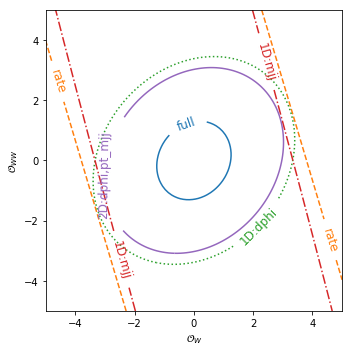

In [11]:
from madminer.plotting import plot_fisher_information_contours_2d

contourplot = plot_fisher_information_contours_2d(
    fisher_information_matrices=list_of_fi, 
    contour_distance=1,
    xlabel=r'$\mathcal{O}_{W}$',
    ylabel=r'$\mathcal{O}_{WW}$',
    xrange=(-5,5),
    yrange=(-5,5),
    inline_labels=list_of_labels,
    resolution=100
)

### 4d) The Fisher Information Histogram

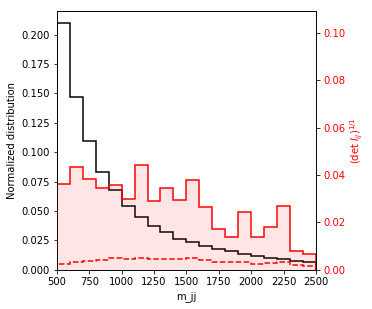

In [12]:
bins_histo, w_in_histo, fi_histo_rate, fi_histo_full = mf.histogram_of_fisher_information(
    theta=thistheta,
    luminosity=thislumi,
    observable=thisyobservable,
    nbins=thisynbins,
    histrange=thisyrange,
    cuts=thiscuts,
    efficiency_functions=thisefficiencies
)

proj_fi_histo_rate=[ project_information(fi_histo_rate[i],[0]) for i in range(0,len(fi_histo_rate))] 
proj_fi_histo_full=[ project_information(fi_histo_full[i],[0]) for i in range(0,len(fi_histo_full))] 

histoplot = plot_distribution_of_information(
    xbins=bins_histo, 
    xsecs=w_in_histo,
    fisher_information_matrices=proj_fi_histo_full, 
    fisher_information_matrices_aux=proj_fi_histo_rate,
    xlabel="m_jj",
    xmin=500,
    xmax=2500,
    log_xsec=False,
    norm_xsec=True
)

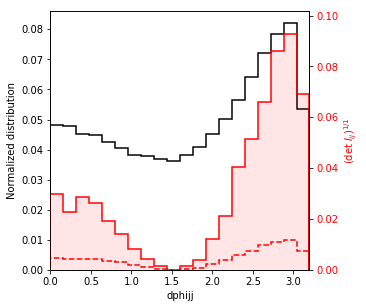

In [13]:
bins_histo, w_in_histo, fi_histo_rate, fi_histo_full = mf.histogram_of_fisher_information(
    theta=thistheta,
    luminosity=thislumi,
    observable=thisxobservable,
    nbins=thisxnbins,
    histrange=thisxrange,
    cuts=thiscuts,
    efficiency_functions=thisefficiencies
)

proj_fi_histo_rate=[ project_information(fi_histo_rate[i],[1]) for i in range(0,len(fi_histo_rate))] 
proj_fi_histo_full=[ project_information(fi_histo_full[i],[1]) for i in range(0,len(fi_histo_full))] 

histoplot = plot_distribution_of_information(
    xbins=bins_histo, 
    xsecs=w_in_histo,
    fisher_information_matrices=proj_fi_histo_full, 
    fisher_information_matrices_aux=proj_fi_histo_rate,
    xlabel="dphijj",
    xmin=0,
    xmax=3.2,
    log_xsec=False,
    norm_xsec=True
)

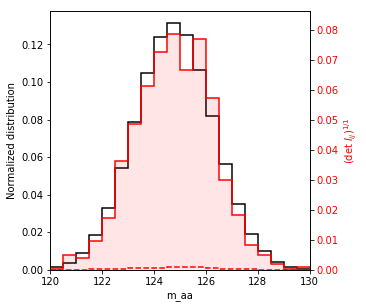

In [14]:
bins_histo, w_in_histo, fi_histo_rate, fi_histo_full = mf.histogram_of_fisher_information(
    theta=thistheta,
    luminosity=thislumi,
    observable='m_aa',
    nbins=20,
    histrange=(120,130),
    cuts=thiscuts,
    efficiency_functions=thisefficiencies
)

proj_fi_histo_rate=[ project_information(fi_histo_rate[i],[1]) for i in range(0,len(fi_histo_rate))] 
proj_fi_histo_full=[ project_information(fi_histo_full[i],[1]) for i in range(0,len(fi_histo_full))] 

histoplot = plot_distribution_of_information(
    xbins=bins_histo, 
    xsecs=w_in_histo,
    fisher_information_matrices=proj_fi_histo_full, 
    fisher_information_matrices_aux=proj_fi_histo_rate,
    xlabel="m_aa",
    xmin=120,
    xmax=130,
    log_xsec=False,
    norm_xsec=True
)

### 4e) Compare Signal vs Signal + Background Fisher Info

Let us now look at the difference between the Fisher Information when only considering the signal, and when also including the background. 

Note that the full truth Fisher Information for the background samples vanishes, and hence the full truth Fisher Information of the combined sample is the same as for the signal only sample. This however, is not physical and hence the full truth Fisher Information of the combined sample as evaluated by MadMiner is meaningless. This problem can be overcome by the MadMiner Machine Learning approach, which will be discussed in the next part. 

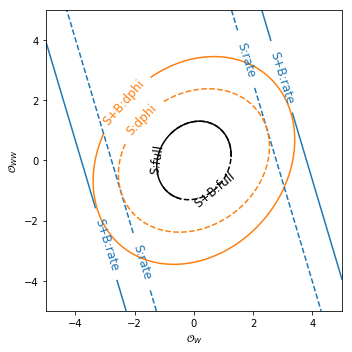

In [15]:
mf_s  = FisherInformation('data/madminer_lhedata_wbf_signal.h5')

fi_full_s, _ = mf_s.calculate_fisher_information_full_truth(
    theta=thistheta,
    luminosity=thislumi
)

fi_rate_s, _ = mf_s.calculate_fisher_information_rate(
    theta=thistheta,
    luminosity=thislumi
)

fi_hist1d_dphi_s, _ = mf_s.calculate_fisher_information_hist1d(
    theta=thistheta,
    luminosity=thislumi,
    observable=thisxobservable,
    nbins=thisxnbins,
    histrange=thisxrange
)

list_of_fi=[fi_full,fi_rate,fi_hist1d_dphi,fi_full_s,fi_rate_s,fi_hist1d_dphi_s]
list_of_labels=["S+B:full","S+B:rate","S+B:dphi","S:full","S:rate","S:dphi"] 
list_of_colors=["black",u'C0',u'C1',"black",u'C0',u'C1']
list_of_linestyles=["solid","solid","solid","dashed","dashed","dashed"]

contourplot = plot_fisher_information_contours_2d(
    fisher_information_matrices=list_of_fi, 
    contour_distance=1,
    xlabel=r'$\mathcal{O}_{W}$',
    ylabel=r'$\mathcal{O}_{WW}$',
    xrange=(-5,5),
    yrange=(-5,5),
    inline_labels=list_of_labels,
    resolution=100,
    colors=list_of_colors,
    linestyles=list_of_linestyles
)